In [1]:
# Cell 1: Imports
import sys
import os
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



from src.region_manager import ConfigurableBoundaryManager
import geopandas as gpd
import json

print("✅ Imports complete")
print(f"Working directory: {os.getcwd()}")

✅ Imports complete
Working directory: C:\storage\ifhe\research\civic pulse\setup_CIVICPULSE_AI\civicpulse-ai_org\notebooks


In [2]:
# Cell 2: Initialize & Display
mgr = ConfigurableBoundaryManager()

print("\n🗺️ CivicPulse India - Geographic Configuration")
print("=" * 70)
print(f"Total regions configured: {len(mgr.regions)}")

# National level
india = mgr.get_region('India')
print(f"\n📍 NATIONAL LEVEL:")
print(f"  India: {india.area_km2:,.0f} km²")
print(f"  Grid cells (1km resolution): {india.grid_cell_count():,}")
print(f"  Bounds: {india.bounds}")

# State level
states = mgr.get_regions_by_level('state')
print(f"\n📍 STATE LEVEL: {len(states)} states")
print("\nTop 5 states by area:")
for i, state in enumerate(sorted(states, key=lambda s: s.area_km2, reverse=True)[:5], 1):
    print(f"  {i}. {state.name}: {state.area_km2:,.0f} km² → {state.grid_cell_count():,} cells")


🗺️ CivicPulse India - Geographic Configuration
Total regions configured: 16

📍 NATIONAL LEVEL:
  India: 9,493,372 km²
  Grid cells (1km resolution): 9,493,372
  Bounds: (68.7, 8.4, 97.5, 35.0)

📍 STATE LEVEL: 15 states

Top 5 states by area:
  1. Rajasthan: 1,129,420 km² → 1,129,419 cells
  2. Madhya Pradesh: 1,003,640 km² → 1,003,639 cells
  3. Maharashtra: 699,413 km² → 699,412 cells
  4. Uttar Pradesh: 637,947 km² → 637,947 cells
  5. Andhra Pradesh: 558,018 km² → 558,018 cells


In [3]:
print("\n" + "=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)

total_area = sum(s.area_km2 for s in states)
total_cells = sum(s.grid_cell_count() for s in states)

print(f"Total area (all states): {total_area:,.0f} km²")
print(f"Total grid cells: {total_cells:,.0f}")
print(f"Average state area: {total_area/len(states):,.0f} km²")


SUMMARY STATISTICS
Total area (all states): 6,051,917 km²
Total grid cells: 6,051,910
Average state area: 403,461 km²


In [4]:
print("\n📤 Exporting boundaries...")
mgr.to_geojson('data/raw/india_regions.geojson')

regions_data = []
for region in mgr.regions.values():
    regions_data.append({
        'name': region.name,
        'level': region.level,
        'area_km2': region.area_km2,
        'cells_1km': region.grid_cell_count(),
        'geometry': region.geometry
    })

regions_gdf = gpd.GeoDataFrame(regions_data, crs='EPSG:4326')
regions_gdf.to_file('data/raw/india_regions.shp')

print("✅ Boundaries exported:")
print("  - data/raw/india_regions.geojson")
print("  - data/raw/india_regions.shp")



📤 Exporting boundaries...
Exported 16 regions to data/raw/india_regions.geojson
✅ Boundaries exported:
  - data/raw/india_regions.geojson
  - data/raw/india_regions.shp


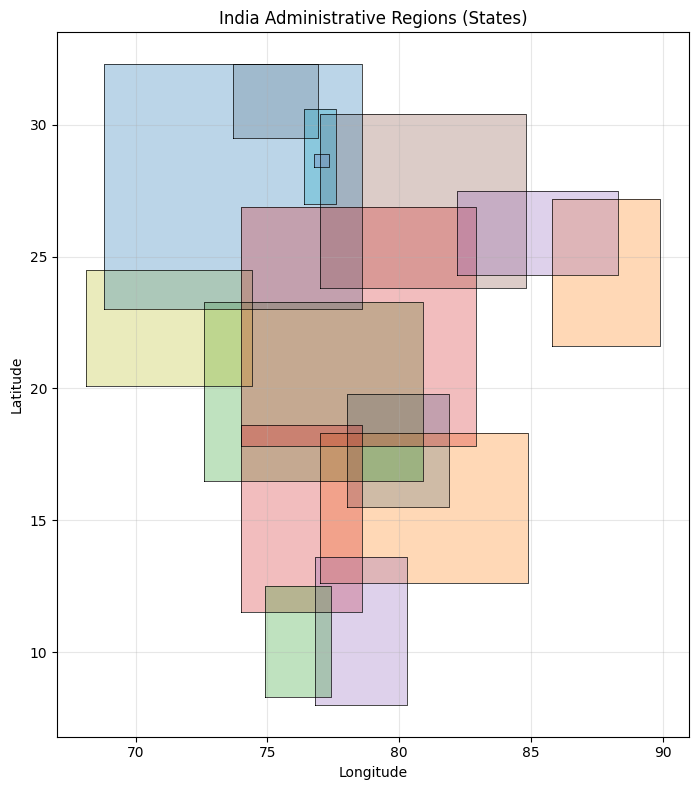

✅ Map saved to data/viz/india_regions_map.png


In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Plot all states
for region in states:
    minx, miny, maxx, maxy = region.bounds
    ax.fill([minx, maxx, maxx, minx], [miny, miny, maxy, maxy], 
            alpha=0.3, label=region.name if len(states) <= 10 else '')
    ax.plot([minx, maxx, maxx, minx, minx], [miny, miny, maxy, maxy, miny], 'k-', linewidth=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('India Administrative Regions (States)')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig('data/viz/india_regions_map.png', dpi=150)
plt.show()

print("✅ Map saved to data/viz/india_regions_map.png")